# Projekt Zaliczeniowy Modelowanie w Naukach o Ziemi

Projekt jest na ocenę. Rezultatem ma być kompletne sprawozdanie. Sprawozdania w formacie pdf przesyłamy w terminie do ostatniego dnia semestru.

Dane do projektu: `plik daily_ice_edge.csv`.

### Krok 0

1. Po przemyśleniu układu danych narysować kontur przedstawiający minimalny zasięg lodu w analizowanym okresie dla wszystkich kątów. 

  a. Przemyśleć układ danych
  
  b. Narysować kontur przedstawiający minimalny zasięg lodu w analizowanym okresie dla wszystkich kątów

Warto zapoznać się z kształtem Antarktydy.   

### Krok 1
  
1. Dla wszystkich kątów (dla każdego z osobna) znaleźć model matematyczny zasięgu lodu w funkcji czasu. 

  a. Zbudować model matematyczny dla każdej kolumny w oparciu o funkcji trygonometryczne (sinusoidalna cykliczność; można o to zapytać).

Uwaga na próbkowanie w czasie oraz na fakt, że czasami lodu morskiego dla danego kąta może nie być. 

### Krok 2
  
1. Stworzyć animację przedstawiającą zmianę w czasie zarówno rzeczywistego jak i wymodelowane.

### Krok 3
 
1. Zaproponować i *w miarę możliwości* obliczyć model zasięgu lodu biorący pod uwagę wszystkie dane na raz (`f(Lat, Lon, t)`).

  a. Przekonać, że świta nam w głowie jakaś idea.

## Wskazówki 

Można zbudować model bazując na sinusach i cosinusach dla każdego kierunku z osobna. Po powtórzeniu dla wszystkich azymutów pojawi się macierz, którą animujemy.

Po narysowaniu minimalnego zasięgu lodu w układzie biegunowym otrzymamy minimalny zasięg lodu przypominający kształt Antarktydy. Uzyskujemy to poprzez znalezienie minimalnej wartości w każdej kolumnie i narysowanie tego w układzie biegunowym.


In [24]:
# install.packages("ggplot2") # nolint: commented_code_linter.
library(ggplot2)

## Dane do projektu

Plik `daily_ice_edge.csv` zawiera informację o zasięgu lodu morskiego wokół Antarktydy dla wszystkich długości geograficznych - w formacie długość-szerokość - na przestrzeni wielu lat. Dane są zapisane w formie macierzy, gdzie wiersze odpowiadają szerokości geograficznej, a kolumny długości geograficznej.

In [25]:
daily_ice_edge <- read.csv(
  "daily_ice_edge.csv"
)
# 1591 wiersz - dane codzienne

In [26]:
# View(daily_ice_edge) # nolint: commented_code_linter.
# View(daily_open_water) # nolint: commented_code_linter.

## Minimalny zasięg lodu na Antarktydzie

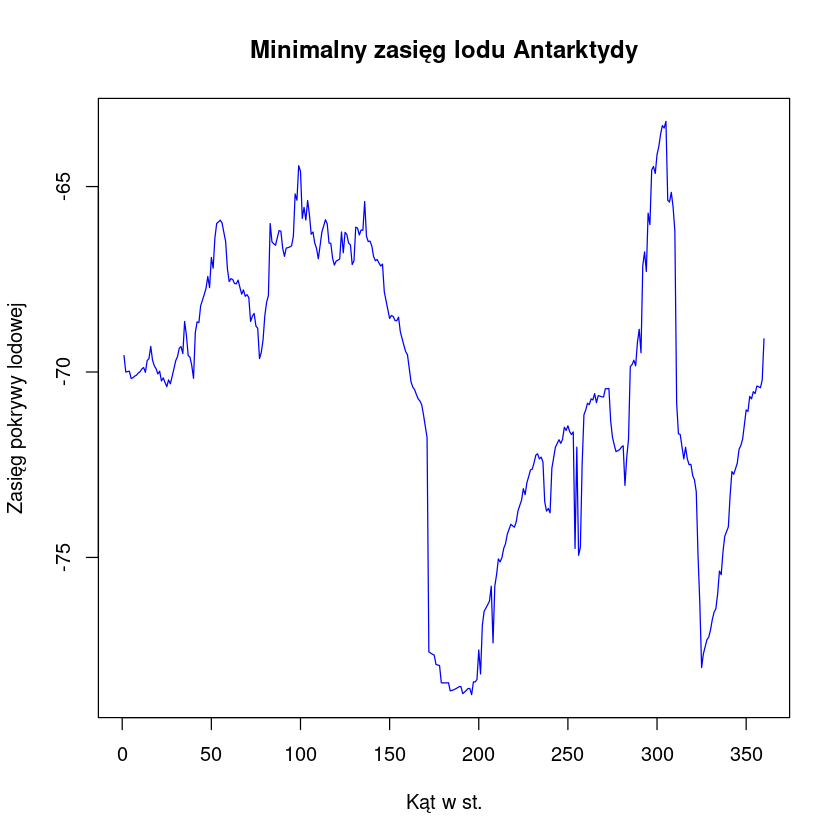

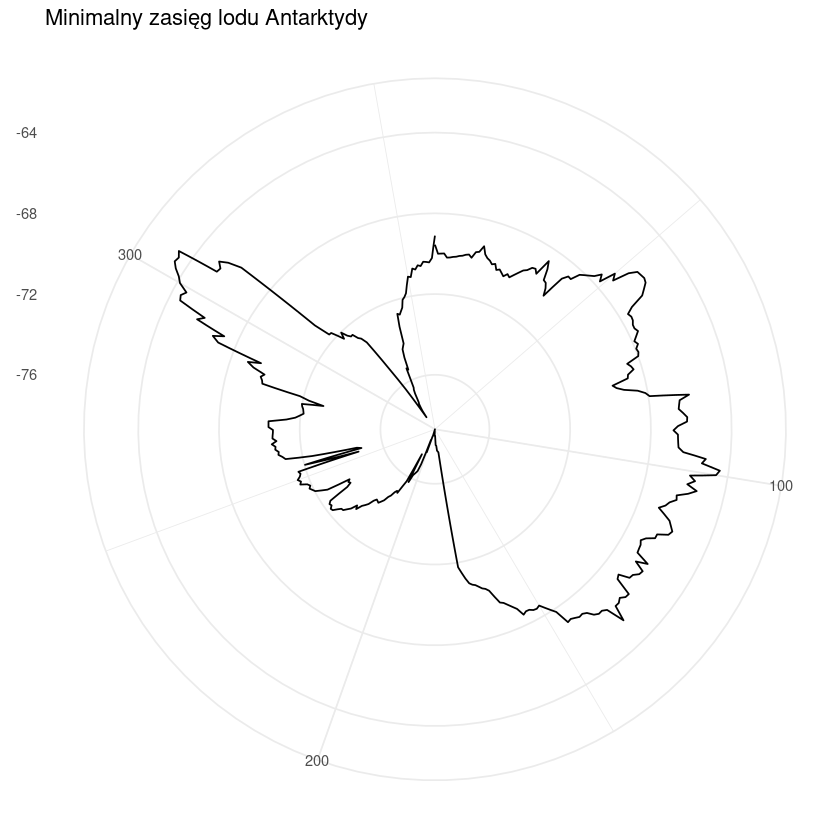

In [37]:
ice_edge_colnum <- length(colnames(daily_ice_edge))
ice_edge_min <- numeric(ice_edge_colnum - 2)

for (i in 2:(ice_edge_colnum - 1)) {
  # Using na.rm = TRUE to handle NA values in columns
  ice_edge_min[i - 1] <- min(daily_ice_edge[, i], na.rm = TRUE)
}

# Convert to data frame
ice_edge_min_df <- as.data.frame(ice_edge_min)

# Base R plot
plot(
  x = seq_along(t(ice_edge_min_df)), y = t(ice_edge_min_df), type = "l",
  col = "blue", xlab = "Kąt w st.", ylab = "Zasięg pokrywy lodowej",
  main = "Minimalny zasięg lodu Antarktydy"
)

# ggplot plot
ggplot(
  data = ice_edge_min_df, aes(x = seq_along(ice_edge_min), y = ice_edge_min)
) +
  geom_line() +
  ggtitle("Minimalny zasięg lodu Antarktydy") +
  coord_polar() +
  theme_minimal() +
  theme(axis.title = element_blank())


In [36]:
View(daily_ice_edge)

Date,longitude_0E,longitude_1E,longitude_2E,longitude_3E,longitude_4E,longitude_5E,longitude_6E,longitude_7E,longitude_8E,⋯,longitude_351E,longitude_352E,longitude_353E,longitude_354E,longitude_355E,longitude_356E,longitude_357E,longitude_358E,longitude_359E,longitude_360E
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
26-Oct-1978,-56.87729,-56.87296,-56.85567,-56.62469,-56.16289,-56.32350,-56.07174,-55.58054,-55.28912,⋯,-57.14537,-56.78660,-56.86864,-56.70481,-56.76505,-56.37441,-56.41266,-56.64327,-56.66043,-56.87729
28-Oct-1978,-56.87729,-57.08573,-56.64327,-56.20085,-55.95161,-55.90147,-55.41872,-54.92673,-54.63404,⋯,-57.35590,-57.20806,-56.86864,-56.70481,-56.76505,-56.37441,-56.41266,-56.64327,-56.66043,-56.87729
30-Oct-1978,-56.87729,-57.08573,-56.64327,-56.20085,-55.74054,-55.48032,-55.41872,-54.92673,-54.63404,⋯,-57.35590,-57.20806,-57.92703,-57.76409,-57.82675,-57.01027,-57.26213,-56.64327,-57.08573,-57.09009
01-Nov-1978,-57.30311,-57.08573,-56.85567,-56.62469,-55.74054,-55.48032,-55.41872,-54.92673,-55.28912,⋯,-57.56661,-57.41908,-57.92703,-57.76409,-58.03973,-57.01027,-57.26213,-57.70752,-57.29872,-57.30311
03-Nov-1978,-57.30311,-57.29872,-57.06830,-57.04942,-56.37441,-55.90147,-55.41872,-54.92673,-55.28912,⋯,-58.44488,-58.50765,-58.56442,-58.21195,-58.25291,-57.87609,-57.68819,-57.70752,-57.72537,-57.30311
05-Nov-1978,-57.72983,-57.51193,-57.06830,-57.26213,-57.01027,-56.11237,-55.86115,-55.79038,-55.28912,⋯,-58.44488,-58.50765,-58.56442,-58.63826,-58.46629,-58.08947,-58.11513,-58.35634,-57.93903,-57.94353
07-Nov-1978,-57.72983,-57.51193,-57.49422,-57.47505,-57.22266,-56.53484,-56.28255,-56.00044,-55.49814,⋯,-58.86880,-58.93260,-58.80361,-58.85171,-58.46629,-58.30305,-58.11513,-58.35634,-58.15291,-57.94353
09-Nov-1978,-57.94353,-57.51193,-57.49422,-57.47505,-57.43527,-57.18909,-56.28255,-56.00044,-55.70736,⋯,-58.86880,-58.93260,-59.01687,-58.85171,-58.67989,-58.30305,-58.11513,-58.35634,-58.36701,-58.15744
11-Nov-1978,-57.94353,-57.93903,-57.49422,-57.47505,-57.64810,-57.18909,-56.70481,-56.21070,-56.12640,⋯,-58.86880,-58.93260,-58.80361,-58.85171,-58.67989,-58.30305,-58.54293,-58.14232,-58.36701,-58.37158


In [39]:
day1 <- t(daily_ice_edge[nrow(daily_ice_edge), ])

start_index <- 2
end_index <- 361

angles <- c()

for (i in seq(start_index, end_index, 1)) {
  angles[i] <- day1[i]
}
angles <- as.data.frame(angles)
values <- as.numeric(angles[2:361, ])
angles <- as.numeric(seq(start_index, end_index, 1))

# plot(x = angles, y = values)
# create df from these 2 vectors
df <- data.frame(angles, values)
# View(df)
ggplot(data = df, aes(x = angles, y = values)) + geom_line() + xlim(2, 361) + coord_polar()

ERROR: Error in t(daily_ice_edge[nrow(daily_ice_edge), ], na.rm = TRUE): unused argument (na.rm = TRUE)
